<a href="https://colab.research.google.com/github/Uintek/WQU_MScFE_capstone_2024_4885/blob/main/SourceCode_SG4885_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Approach to Identify and Analyze a Systemic Financial Risk
## Source Code

Student Group : 4885 [Win Htet, Hnin Oo Wai]

Here, we will try to implement the data preparation parts and basic EDA to know about the data.

In [1]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define the date range of daily data
start_date = '1980-01-01'
end_date = '2024-02-01'

# Get the data
df = yf.download('^GSPC', start=start_date, end=end_date)

# The resulting DataFrame will have the Open, High, Low, Close, Adj Close, and Volume of the S&P 500 index.
print(df.head())

[*********************100%%**********************]  1 of 1 completed

            Open        High         Low       Close   Adj Close    Volume
Date                                                                      
1980-01-02   0.0  108.430000  105.290001  105.760002  105.760002  40610000
1980-01-03   0.0  106.080002  103.260002  105.220001  105.220001  50480000
1980-01-04   0.0  107.080002  105.089996  106.519997  106.519997  39130000
1980-01-07   0.0  107.800003  105.800003  106.809998  106.809998  44500000
1980-01-08   0.0  109.290001  106.290001  108.949997  108.949997  53390000


In [2]:
# View the data types and non-null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11114 entries, 1980-01-02 to 2024-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11114 non-null  float64
 1   High       11114 non-null  float64
 2   Low        11114 non-null  float64
 3   Close      11114 non-null  float64
 4   Adj Close  11114 non-null  float64
 5   Volume     11114 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 607.8 KB


In [3]:
# DATA CLEANING

# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Handle outliers
q1 = df['Adj Close'].quantile(0.10)
q3 = df['Adj Close'].quantile(0.90)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = df[df['Adj Close'] <= upper_bound]

# Standardize data with StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Set the index of df_scaled to be the same as df
df_scaled.index = df.index

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0


In [4]:
print(df_scaled.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1980-01-02 -1.115976 -1.033402 -1.034026 -1.034789  -1.034789 -0.992616
1980-01-03 -1.115976 -1.035471 -1.035833 -1.035267  -1.035267 -0.987423
1980-01-04 -1.115976 -1.034591 -1.034204 -1.034116  -1.034116 -0.993395
1980-01-07 -1.115976 -1.033957 -1.033572 -1.033859  -1.033859 -0.990569
1980-01-08 -1.115976 -1.032645 -1.033135 -1.031965  -1.031965 -0.985893


Though we already found out earlier about null value and missing value, this is to make sure that our data sets has no abnormal or outlier data.

## UNIVARIATE ANALYSIS

In [5]:
# DATA VISUALIZATION

#import libraries first
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

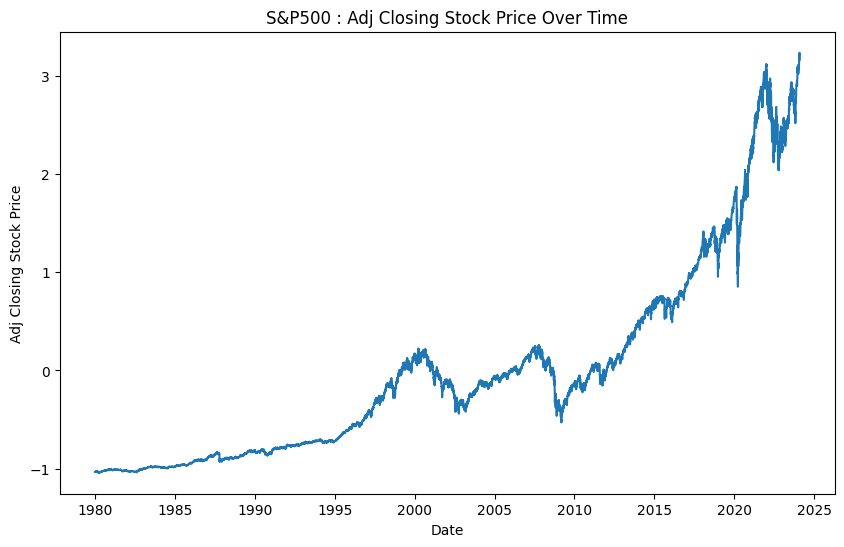

In [6]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Adj Close', data=df_scaled)
plt.title('S&P500 : Adj Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Closing Stock Price')
plt.show();

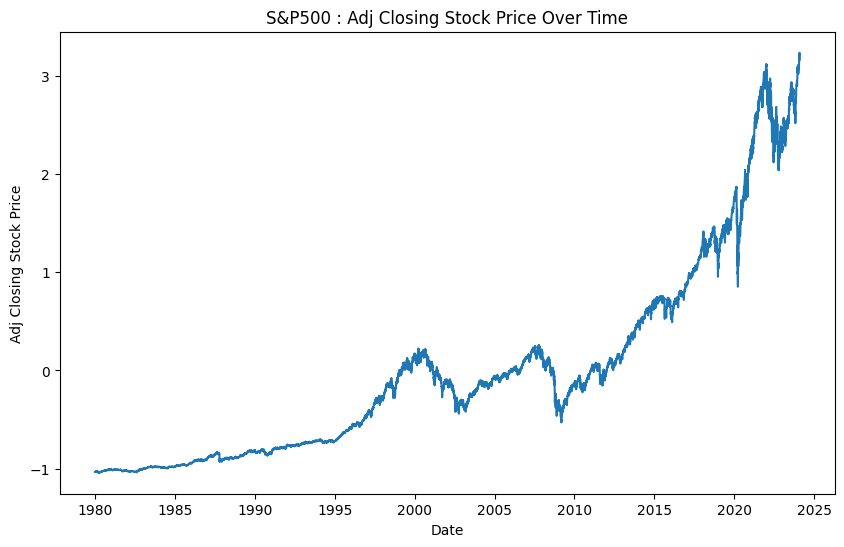

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Adj Close', data=df_scaled)
plt.title('S&P500 : Adj Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Closing Stock Price')
plt.show();

We can find that the Adj Closing price of S&P stock is increasing over time with some fluctuation happened around 2020 (due to pandemic). However, when we compared this trend to 2008 financial crisis, we can find that the downward trend patterns are different. One noticeable fact is the recovery period. It took more than a year and half for the recession to finalize during 2008 crisis, and during 2019 pandemic period, it seems to take around one year for the stock price to bounce back to its original position before the pandemic.

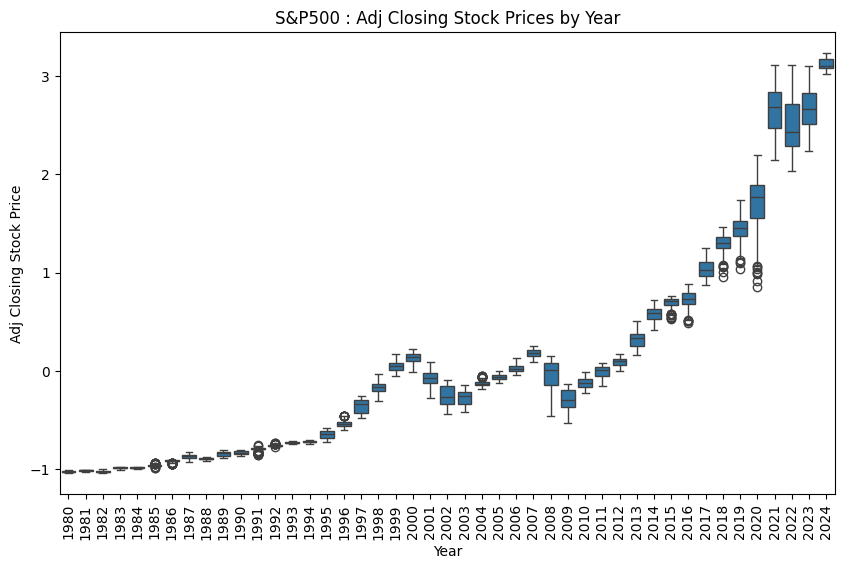

In [8]:
# Box Plot yearly
plt.figure(figsize=(10, 6))
df_scaled['Year'] = df_scaled.index.year
sns.boxplot(x='Year', y='Adj Close', data=df_scaled)
plt.title('S&P500 : Adj Closing Stock Prices by Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Adj Closing Stock Price')
plt.show();

With this plot, we can find that around 2018 to 2020, the price increased over time with some outliers.

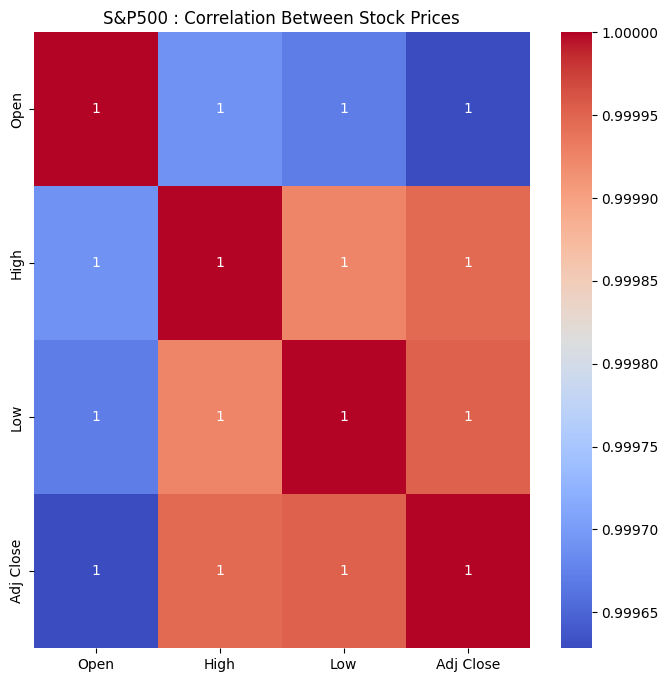

In [9]:
# HEAT MAP (CORRELATION)

# Calculate the correlation matrix
corr = df_scaled[['Open', 'High', 'Low', 'Adj Close']].corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('S&P500 : Correlation Between Stock Prices')
# Display the plot
plt.show()

We can find that the correlation between Open and High has strong positive while that of between Low and Adj Close has strong positive. Vice versa of each other as weaker positive correlations.

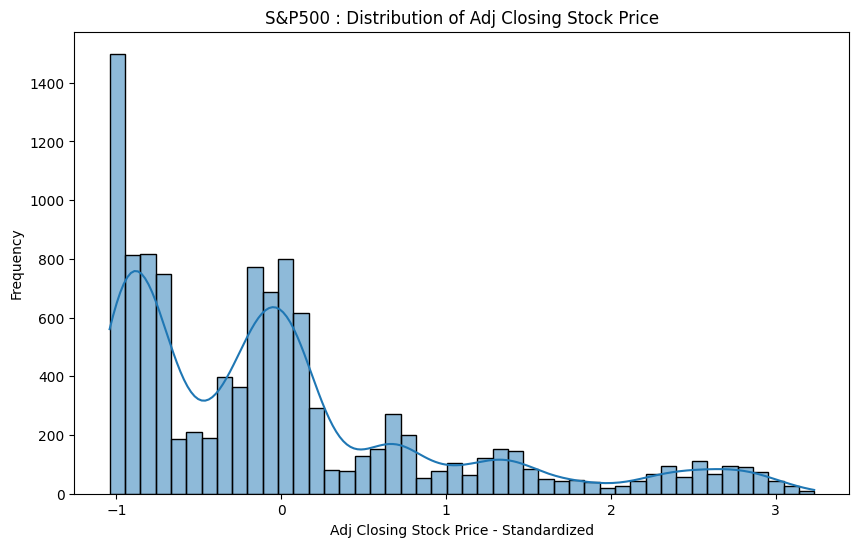

In [10]:
# HISTOGRAM (Distribution)

plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Adj Close'], kde=True)
plt.title('S&P500 : Distribution of Adj Closing Stock Price')
plt.xlabel('Adj Closing Stock Price - Standardized')
plt.ylabel('Frequency')
plt.show()

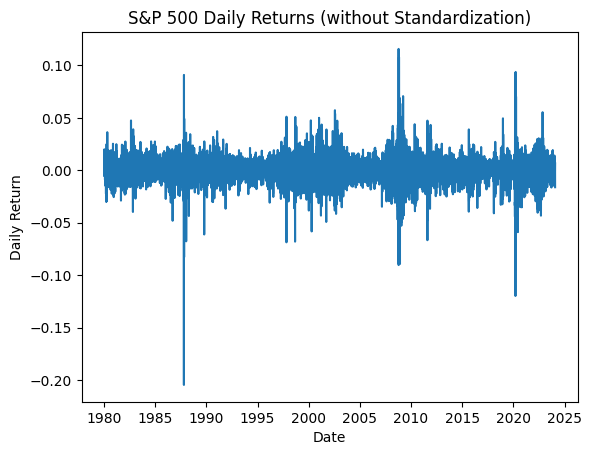

In [11]:
# PERCENT CHANGE (Daily Returns)

daily_returns = df['Adj Close'].pct_change()

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('S&P 500 Daily Returns (without Standardization)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.

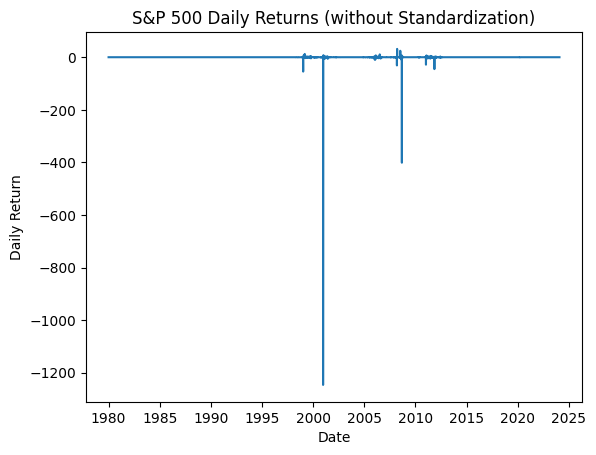

In [12]:
daily_returns_s = df_scaled['Adj Close'].pct_change()

# Create a line chart of the daily returns with Standardization
plt.plot(daily_returns_s.index, daily_returns_s.values)
plt.title('S&P 500 Daily Returns (without Standardization)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

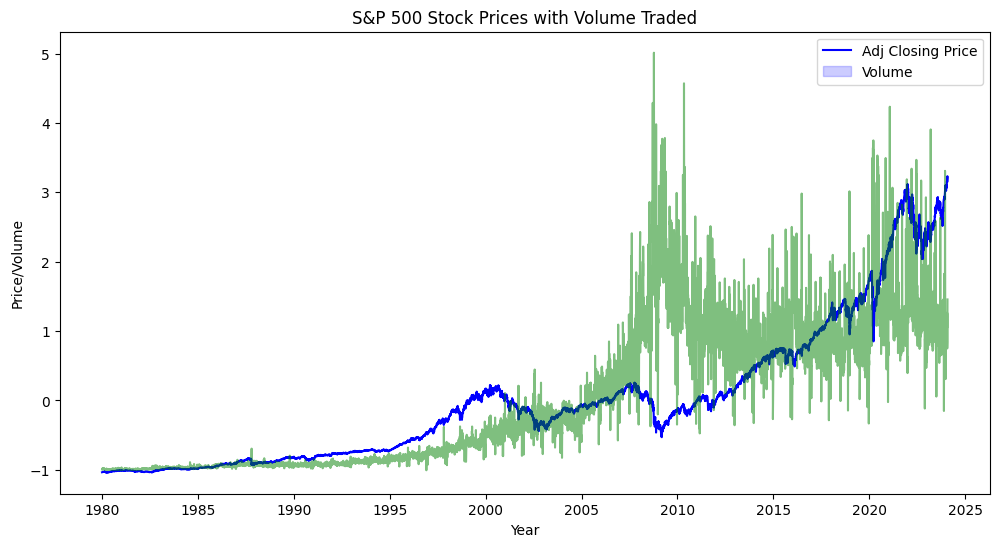

In [13]:
# Combination chart to visualize the stock prices with the volume traded

# Create a combination plot of stock prices and volume traded
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Adj Close', data=df_scaled, color='b')
sns.lineplot(x='Date', y='Volume', data=df_scaled, color='g', alpha=0.5)
plt.title('S&P 500 Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Adj Closing Price', 'Volume'])
plt.show()

In [14]:
# Correlation between Adj Closing Price and Volume traded for S&P500
df_scaled["Adj Close"].corr(df_scaled["Volume"])

0.7085544968319382

## BIVARIATE AND MULTIVARIATE ANALYSIS

This time, we will try to use external economic indicators such as GDP growth rate, interest rate, inflation rate and unemployment rate with PCA method to identify the systmic risk,

In [15]:
from sklearn.decomposition import PCA # Using Principal Component Method to use Multivariate Analysis


In [16]:
# PLEASE UPLOAD "datasets_capstone_4885.csv" file to the read_csv path
# "datasets_capstone_4885.csv" contains the annual data points of external economic indicators
df_annual = pd.read_csv('datasets_capstone_4885.csv')
df_annual["Year"] = pd.to_datetime(df_annual["Year"])
df_annual = df_annual.set_index("Year")
df_annual['Year'] = df_annual.index.year
df_annual = df_annual.set_index("Year") # Format index into Year

# S&P 500 data
df_daily = df["Adj Close"]
# Changing daily data to annual data
df_daily_annual = df_daily.resample('A').last()
# Changing into DataFrame and formatting
df_daily_annual = pd.DataFrame(df_daily_annual)
df_daily_annual['Year'] = df_daily_annual.index.year
df_daily_annual = df_daily_annual.set_index("Year") # Format index into Year
df_daily_annual.columns = ["S&P500"] # Change column name to S&P500

# Merge the datasets
df_annual["S&P500"] = df_daily_annual["S&P500"]
df_m = df_annual.copy()
print(df_m.head())

      GDP_Growth_Rate  Inflation_Rate  Unemployment_Rate  Interest_Rate  \
Year                                                                      
1980             -0.3            13.5                7.2          13.35   
1981              2.5            10.4                7.6          16.39   
1982             -1.8             6.2                9.7          12.24   
1983              4.6             3.2                9.6           9.09   
1984              7.2             4.4                7.5          10.23   

          S&P500  
Year              
1980  135.759995  
1981  122.550003  
1982  140.639999  
1983  164.929993  
1984  167.240005  


In [17]:
# Replace missing values
df_m.fillna(method ='ffill', inplace = True)

# Standardize the features to have mean=0 and variance=1
features = ['S&P500', 'GDP_Growth_Rate', 'Interest_Rate', 'Inflation_Rate', 'Unemployment_Rate']
x = df_m.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Convert the principal components for each data point to a dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

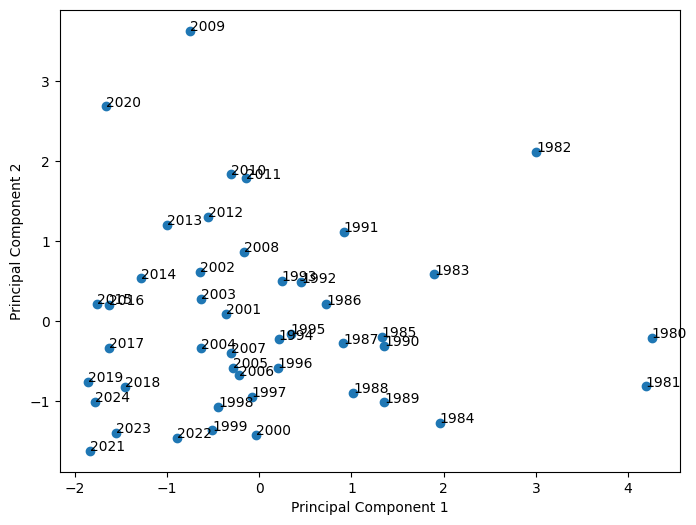

In [18]:
# Visualize the principal components
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
# Add year labels to the scatter plot
for i, year in enumerate(df_m.index):
    plt.text(principalDf.iloc[i, 0], principalDf.iloc[i, 1], str(int(year)))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The scatter plot visualizes the principal components, which are the directions in which the original data varies the most. Each point on the scatter plot represents a year, and the coordinates of the point are the values of the first and second principal components for that year.

We can see that the dot com crush period (2000 to 2002) and 2008 financial crisis possess similar systemic risk profiles since they are nearer to each other. Yet, regarding 2019 pandemic, we can find different positioning on the plot. This can indicate that 2019 pandemic did not impose as much systemic risk threat as 2008.

[0.41505145 0.26294005]


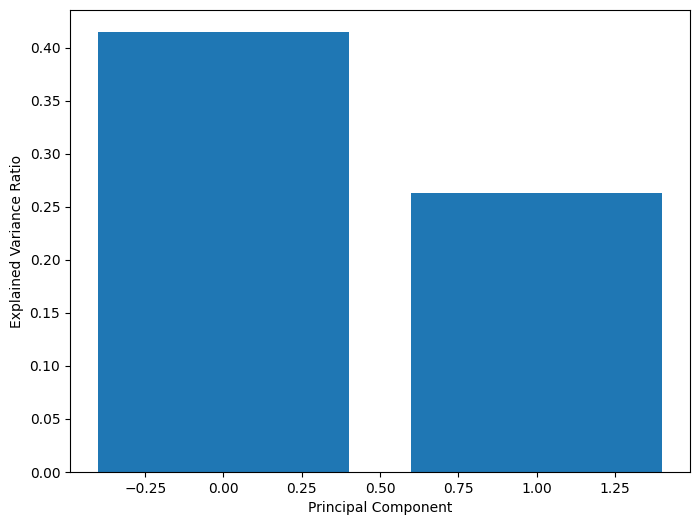

In [19]:
# Print explained variance
print(pca.explained_variance_ratio_)

# Visualize the explained variance ratio
plt.figure(figsize=(8,6))
plt.bar(range(2), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

PCA reduces the dimensionality of the data by creating new features (principal components) that capture the most variance in the data.

The explained variance ratio [0.41505145, 0.26294005] means that the first principal component explains approximately 41.5% of the variance in the data, and the second principal component explains approximately 26.3% of the variance.
This means that these two components together explain about 67.8% of the total variance. The remaining variance is explained by other factors not captured in these two components.

In [20]:
print(pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2']))

      S&P500  GDP_Growth_Rate  Interest_Rate  Inflation_Rate  \
PC1 -0.51549         0.016656       0.613519        0.502181   
PC2 -0.17207        -0.620370      -0.267885       -0.260486   

     Unemployment_Rate  
PC1           0.324656  
PC2           0.667771  


We can interpret the result as follows:

*   PC1: The first principal component is strongly influenced by the S&P 500, Interest Rate, and Inflation Rate as they have high absolute values. This suggests that these three variables move together and might represent some form of economic condition. For example, when the S&P 500 goes down, the interest rate and inflation rate might also go down, indicating a downturn in the economy.
*   PC2: The second principal component is strongly influenced by the GDP Growth Rate and Unemployment Rate. This suggests that these two variables move together and might represent another form of economic condition. For example, when the GDP growth rate goes down, the unemployment rate might go up, indicating an economic recession.

## ARIMA Model

Before performing the ARIMA model, we will try to separate the dataset in train and test with 90-10 ratio.

In [21]:
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

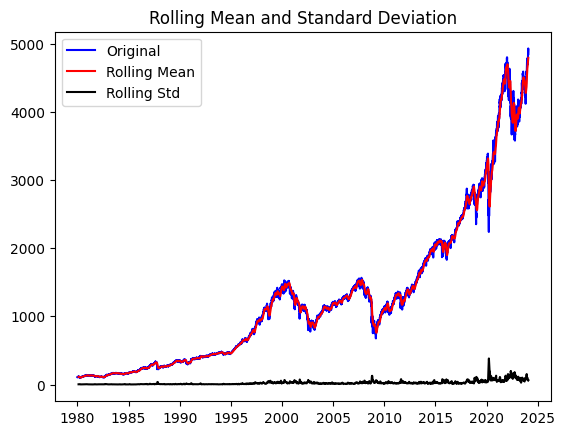

Results of dickey fuller test
Test Statistics                    2.418118
p-value                            0.999019
No. of lags used                  37.000000
Number of observations used    11076.000000
critical value (1%)               -3.430941
critical value (5%)               -2.861801
critical value (10%)              -2.566909
dtype: float64


In [22]:
df_a = df["Adj Close"]

#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_a)

The Dickey-Fuller test is a statistical test for testing stationarity in a time series. Stationarity is an important characteristic of time series data that determines its behavior and properties. A time series is said to be stationary if its statistical properties such as mean, variance, and autocorrelation are all constant over time.

Test Statistics (2.418118): This is the actual value of the test statistic (t-statistics)

p-value (0.999019): The p-value is used in hypothesis testing to support or reject the null hypothesis. It represents the probability that the results of your test occurred at random. If p-value is close to 1 (as in this case), it’s a strong indicator that the time series is non-stationary.

No. of lags used (37.000000): This is the number of lagged observations used in the regression when performing the test.

Number of observations used (11076.000000): This is the number of observations that were used in the regression.

Critical values: These are the test statistic values at which you reject the null hypothesis if the calculated test statistic is less than the critical value. If the Test Statistics is more than the Critical Value, we fail to reject the null hypothesis and infer that the time series is non-stationary.

<Figure size 640x480 with 0 Axes>

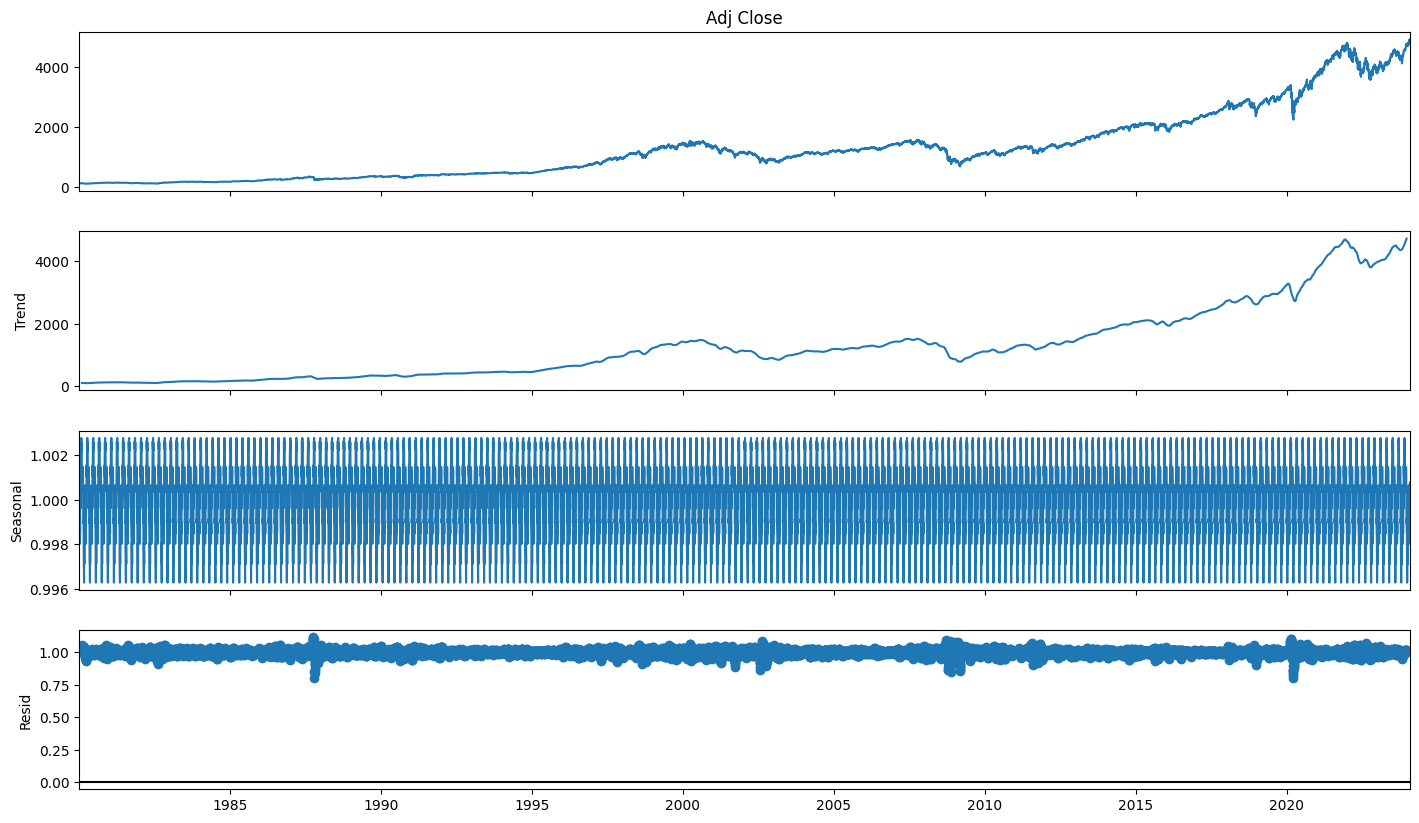

In [23]:
#To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
result = seasonal_decompose(df_a, model='multiplicative', period = 50)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

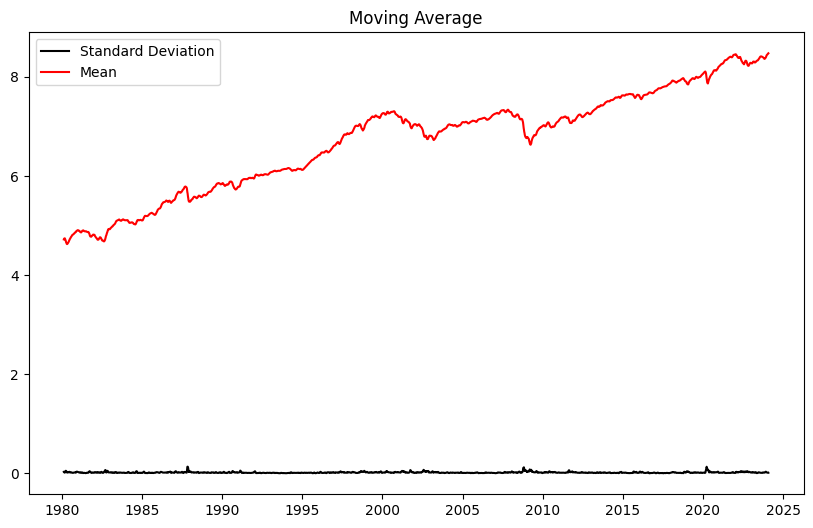

In [24]:
# Since it is non-stationary, we will try to eliminate the trends by performing log transform
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_a)
moving_avg = df_log.rolling(30).mean()
std_dev = df_log.rolling(30).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show();

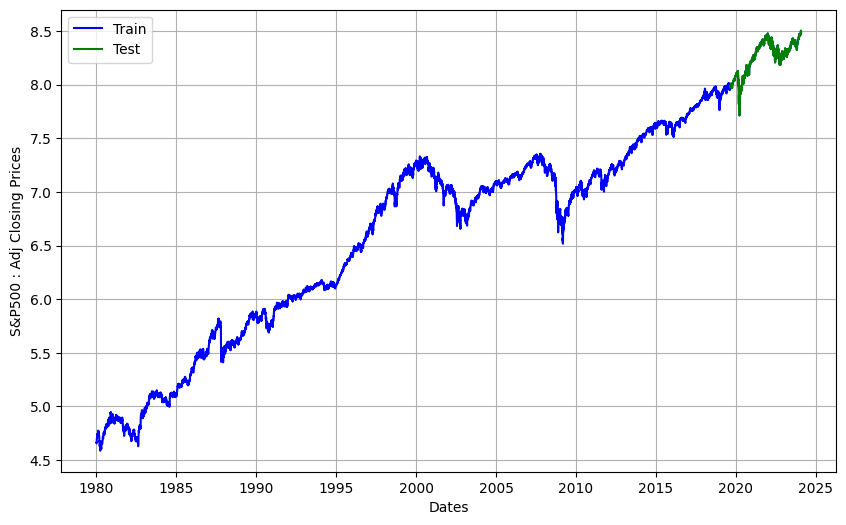

In [25]:
# Train-Test Split 90-10
train_size = int(len(df_log) * 0.9)
train, test = df_log[0:train_size], df_log[train_size:len(df_log)]

# Plot Train & Test datasets
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('S&P500 : Adj Closing Prices')
plt.plot(df_log, 'blue', label='Train')
plt.plot(test, 'green', label='Test')
plt.legend();

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-61790.456, Time=4.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-61795.831, Time=3.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-61796.496, Time=4.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-61783.380, Time=1.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-61807.169, Time=8.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-61810.392, Time=13.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-61811.964, Time=5.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-61810.155, Time=2.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-61808.186, Time=5.48 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-61803.558, Time=1.13 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 49.977 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10002
Model:               SARIMAX(2, 1, 0)   

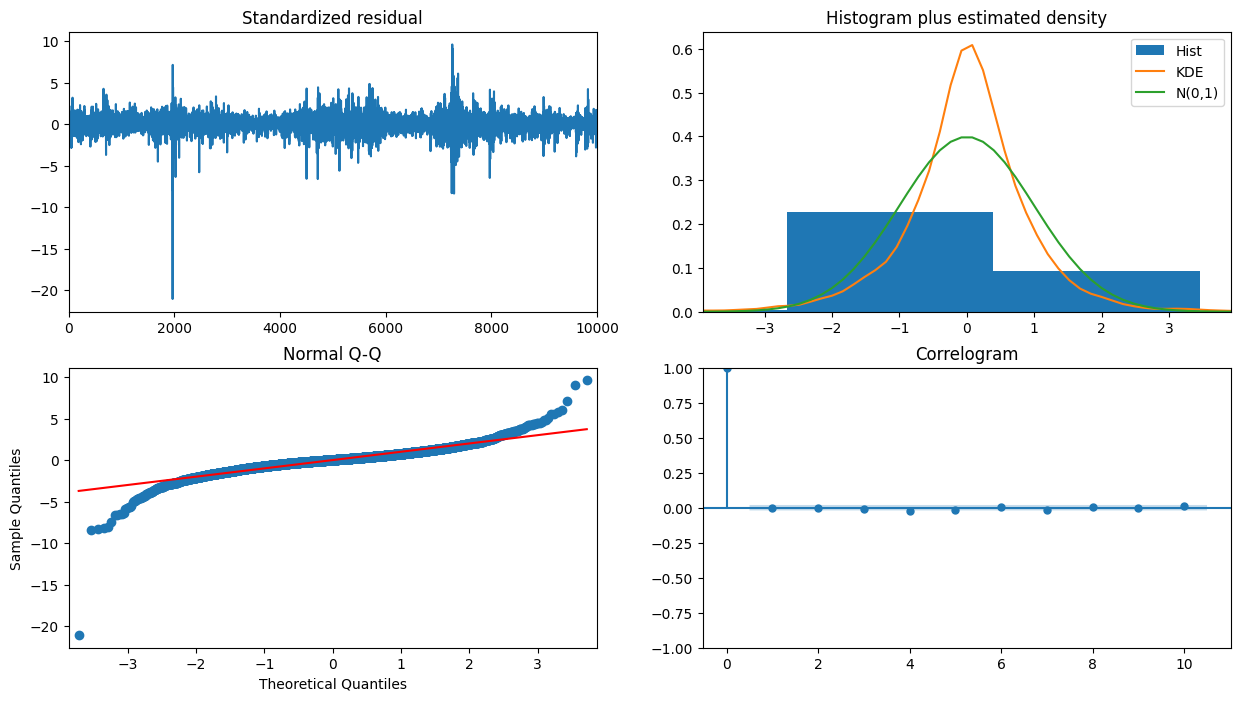

In [26]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

The Standardized Residual seems to possess mean 0 and variance 1.

The density histogram seems to follow normal distribution with mean 0.

The red line seems to align with most of the dots.

The ACF plot suggests that no significant point existed.

In [27]:
#Modeling
# Build Model
model = SARIMAX(train, order=(2,1,0))
fitted = model.fit(disp=-1)
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                10002
Model:               SARIMAX(2, 1, 0)   Log Likelihood               30904.779
Date:                Sun, 03 Mar 2024   AIC                         -61803.558
Time:                        17:04:24   BIC                         -61781.927
Sample:                             0   HQIC                        -61796.236
                              - 10002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0273      0.005     -5.404      0.000      -0.037      -0.017
ar.L2         -0.0416      0.004    -10.477      0.000      -0.049      -0.034
sigma2         0.0001   4.84e-07    250.351      0.0

In [28]:
forecast = fitted.forecast(steps=len(test))
forecast.index = test.index
# report performance
mse = mean_squared_error(test, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, forecast))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(forecast - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 0.10262832826012487
MAE: 0.28786458970975926
RMSE: 0.32035656425321596
MAPE: 0.03455157895669298


MAPE of 3.5% suggests that the model is 96.5% accurate in predicting the next sequencial observations.

As the results from the above code and calculation, we can conclude that multivariate data analysis can determine the influence on the chance of systemic risk happening. And also, We can determine that ARIMA model is not good enough to predicting the non-standardized trends like systemic risk.

## REFERENCES

1.  Adamjee, Uzair. “Exploratory Data Analysis on Stock Market Data | by Uzair Adamjee | MLearning.ai.” Medium, 4 March 2023, https://medium.com/mlearning-ai/exploratory-data-analysis-on-stock-market-data-5d99fbdf3b04. Accessed 8 January 2024.

2.  SarangGami. “SarangGami/Capstone-EDA-project-Airbnb-bookings-analysis: Exploratory data analysis of Airbnb bookings in New York City to gain insights into the travel industries and Uncovers trends, patterns, user preferences and behavior. Utilizes Python libraries for .” GitHub, 2021, https://github.com/SarangGami/Capstone-EDA-project-Airbnb-bookings-analysis. Accessed 8 January 2024.

3.  Dhaduk, H. (2021, July 18). Stock market forecasting using Time Series analysis With ARIMA model. Analytics Vidhya. Retrieved February 13, 2024, from https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/